# Agent-based model のチュートリアル

このノートブックでは Boltzmann money modelを例にAgent-based Modelのコードの書き方を解説する．
コードはPythonで実装し，最小限のコードでクラスオブジェクトを使った計算の例を示す．

## Boltzmann money model

Dragulescu と Yakovenko　は所得不平等の生成プロセスを説明するシンプルなモデルを提唱した．
仮定は以下の通り([Yakovenkoさんのwebsite](http://physics.umd.edu/~yakovenk/econophysics/))

1. エージェントは等しい初期資産1を持ち，ランダムに出会う
2. エージェントは出会った他者に自分の資産を1単位わたす．ただし自分の資産が0以下の場合は何もしない

この仮定の下でエージェントがランダムに出会って交換を繰り返すと，資産の分布はBoltzmann-Gibbs法則に従う．

このモデルをPythonで計算してみよう．なおこの単純な計算のために，わざわざAgentクラスを定義する必要はない．
しかしこのチュートリアルでは，オブジェクトの考え方に慣れるために，あえてクラスを使ったコードで計算する．

コード作成にあたり[Mesa](https://github.com/projectmesa)のサンプルコードを参照した．
Mesaは包括的なAgent-based Model用のライブラリである．


はじめに計算に必要なライブラリを導入する．以下のコードは上から順番に入力していくことを前提にしている．

In [1]:
# ライブラリの導入
import random
import matplotlib.pyplot as plt
import numpy.random as rd

次にAgentのクラスを定義する

In [2]:
# define class of Agent
class Agent:
    def __init__(self, unique_id):
        self.unique_id = unique_id #agentのid番号を記録する
        self.wealth = 1 #初期資産の定義

このクラスは初期化メソッドだけを含み，クラス固有のメソッドは持っていない．インスタンス化する際の引数はunique_idだけである（selfはpythonの仕様で必ず書く）．例えばx = Agent(2)のようにインスタンス化する．するとこの「2」がunique_idの値として保存される．
実際にやってみよう．

In [3]:
x = Agent(2)

このようにインスタンス化すると，オブジェクトxのインスタンス変数unique_idに値2が代入される．
確認してみよう

In [4]:
x.unique_id

2

次にAgentクラスをn個まとめてインスタンス化する．

In [5]:
# define No.of agents
n = 10 

# define agents (instance of Agent)
agentｓ = [Agent(i) for i in range(n)] 

ここでは配列agentsにfor文を使ってn=10個のAgentクラスのオブジェクトを代入している．

配列の中にfor文を書けるところが，ちょっとおもしろい．可読性も高いし，短くて済む．

（こういう点がPythonの特徴のひとつだろう）

agentsの中身を確認してみよう．

In [6]:
agents

__main__.Agent という表示でオブジェクトがat以下のメモリ上のアドレスに格納されたことが分かる.

例えば0番目のAgentのメモリ上のアドレスを調べるにはid関数を使い，hexで16進数表示すると


In [7]:
hex(id(agents[0]))

'0x78e2940'

さきほど表示した配列agentsの中身と一致することが分かる．

慣れないうちはagentsという配列の中には抽象的なAgentクラスのオブジェクトが入っていることがイメージしにくいかもしれない．
そのような場合は個々のAgentを呼び出して属性を確認してやればよい．

In [8]:
agents[3].unique_id

3

ちゃんと配列の位置に対応したunique_idをAgentオブジェクトが持つことが示された．

次にランダムマッチングしたAgentがお金のやりとりをする関数giving_moneyを定義する．

（この部分をAgentクラスの固有メソッドとして定義してもいいのだが，無駄にややこしくなるので単純な関数として定義した）

In [9]:
# define functions
def giving_money():
    agent1 = random.choice(agents)# 1人ランダムに選ぶ
    agent2 = random.choice(agents)# 1人ランダムに選ぶ
    if agent1.wealth > 0:
        agent2.wealth +=1 # 2の資産を1単位増やす
        agent1.wealth -=1 #　1の資産が1減る

この関数の動作は以下の通りである．

1. まず，関数`random.choice`を使ってAgentを2人選び出す．
2. 次にagent1の資産が1以上なら相手に渡す．

まれに自分自身が相手になってしまうが，自分で自分に与えるので問題はない．

ほかの言語の感覚からするとagentsを関数の引数にしなくていいのか？という気もするが
さきほど確認したとおり，agentsをグローバルに定義しているので，参照できるようだ．

これで準備完了．あとは繰り返し回数timeを指定して,関数`giving_money()`を
for文で繰り返し実行すればよい

In [10]:
time = 10 # define No. of interaction　
                
# compute interactions    
for i in range(time):
    giving_money()

以上で終了．
計算の結果を確認してみよう．

(array([ 3.,  0.,  0.,  5.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

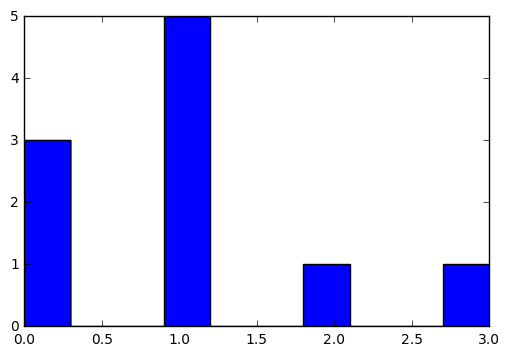

In [11]:
# analyze statistics                
agent_wealth = [x.wealth for x in agents]# 各自の資産を取り出す．
%matplotlib inline
#jupyterでplotをインライン表示するための命令
# 交換後の資産分布
plt.hist(agent_wealth)#plot a histogram


agent_wealth = [x.wealth for x in agents]

は，各Agentの属性wealthだけを取り出した配列を作っている．

## まとめ

では最初からコードをまとめて，計算後の資産分布をplotするまで実行してみよう

n=50, time=500と仮定する．

(array([ 23.,  16.,   6.,   0.,   2.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

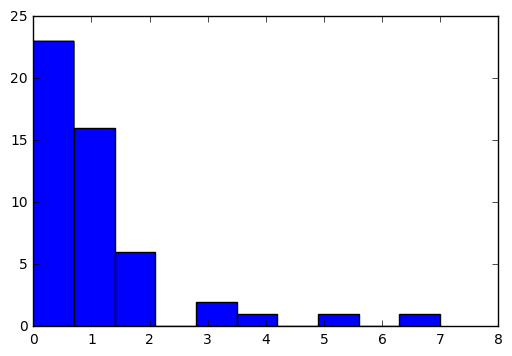

In [12]:
# ライブラリの導入
import random
import matplotlib.pyplot as plt
import numpy.random as rd

# define class of Agent
class Agent:
    def __init__(self, unique_id):
        self.unique_id = unique_id #agentのid番号を記録する
        self.wealth = 1 #初期資産の定義

# define functions
def giving_money():
    agent1 = random.choice(agents)# 1人ランダムに選ぶ
    agent2 = random.choice(agents)# 1人ランダムに選ぶ
    if agent1.wealth > 0:
        agent2.wealth +=1 # 2の資産を1単位増やす
        agent1.wealth -=1 #　1の資産が1減る

n = 50 # define No.of agents
time = 500 # define No. of interaction　

# define agents (instance of Agent)
agentｓ = [Agent(i) for i in range(n)] 

# compute interactions    
for i in range(time):
    giving_money()
     
# analyze statistics                
agent_wealth = [x.wealth for x in agents]# 各自の資産を取り出す．
%matplotlib inline
plt.hist(agent_wealth)#plot a histogram

計算の結果，現実の所得分布の特徴（中低層が多く，高層が少ない）を再現した分布が生成された

ちなみにクラスを使わず関数だけで書くと，さらにコードはシンプルになる．
以下はMathematicaで作った例．

```mathematica
moneymodel[n_, k_] := Module[{money, id, give},
  id = Range[n];
  money = Table[1, {n}];(* 初期資産の設定 *)
  (* interaction 用の関数定義*)
  give[] := Module[{self, other},
    self = RandomInteger[{1, n}];
    other = RandomInteger[{1, n}];
    If[money[[self]] > 0,
     money[[other]] = money[[other]] + 1;
     money[[self]] = money[[self]] - 1]];
  Do[give[], {k}];
  Histogram[money]]
```

この関数　moneymodel[n, k] の引数は`n`がエージェントの数で`k`が試行回数(ランダムマッチの回数)である．